In [232]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
import statsmodels.formula.api as sm
from sklearn.metrics import classification_report

card=pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\Logistic Regression\\creditcard.csv",header=0)

def data_visualization(card):
    
    #Bar Plots for Categorical Columns

    sb.countplot(x="card",data=card,palette="hls") # Imbalanced Dataset as the values in Target Variable is unevenly distributed
    plt.show()
    sb.countplot(x="owner",data=card,palette="hls") #Values for this attribute distributed somewhat uniformly
    plt.show()
    sb.countplot(x="selfemp",data=card,palette="hls") #Values for this attribute distributed unevenly in the Dataset
    plt.show()
    
    pd.crosstab(card.card,card.owner).plot(kind="bar") #Values for these attributes distributed somewhat uniformly
    plt.show()
    pd.crosstab(card.card,card.selfemp).plot(kind="bar")
    plt.show()
    #Theres a accountable variation between these attributes.Hence Acceptance of card also depends on the Selfemp attribute along with other parameters


# Data Distribution - Boxplot of continuous variables wrt to categorical columns

    sb.boxplot(x="card",y="income",data=card,palette="hls")
    plt.show()
#Theres not much difference between the median of the income for Accepted and Rejected Applications.So its quite hard to predict
#Acceptance based on just income.

    sb.boxplot(x="card",y="expenditure",data=card,palette="hls")
    plt.show()
#Its evident from the plot that applications will be rejected with smaller values of Expenditure

    sb.boxplot(x="card",y="age",data=card,palette="hls")
    plt.show()
#Its evident from the plot that the Acceptance/Rejection of Application is less dependent on the age of the individual as the
#Median for both Acceptance and Rejection lie in the same range or theres not noticable Margin between Acceptance and Rejection median

    sb.boxplot(x="owner",y="income",data=card,palette="hls")
    plt.show()
#Its evident from the plot that people owning Home are tend to have High income than the people who don't own a Home
    
    return None

#data_visualization(card)
card

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1315,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,1316,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,1317,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,1318,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [233]:
#Finding NaN Values in the Dataframe and eliminating them

#nan_records = card[card['income'].isnull()]               # To find records with NaN Values in it
card.dropna(inplace=True)
#There were no NaN values presnt in the Dataframe so the shape of Df remains same even after dropna() has been called

card["Acceptance"] = 0
card.loc[card.card == "yes","Acceptance"] = 1

dummies=pd.get_dummies(card[['owner','selfemp']])
card.drop(['Unnamed: 0','owner','selfemp','card'],axis=1,inplace=True)
card = pd.concat([card,dummies],axis=1)
card=card[['reports', 'age', 'income', 'share', 'expenditure', 'dependents','months', 'majorcards', 'active', 'owner_no', 'owner_yes','selfemp_no', 'selfemp_yes','Acceptance']]

#Standardizing Each Column Values
standard_card = pd.DataFrame(data = scale(card.iloc[:,0:13]), columns = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents','months', 'majorcards', 'active', 'owner_no', 'owner_yes','selfemp_no','selfemp_yes'])
standard_card['Acceptance']=card['Acceptance']
standard_card

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_no,owner_yes,selfemp_no,selfemp_yes,Acceptance
0,-0.339397,0.439254,0.681894,-0.374787,-0.220766,1.608362,-0.019135,0.472824,0.793701,-1.127042,1.127042,0.272221,-0.272221,1
1,-0.339397,0.003639,-0.558317,-0.671269,-0.643854,1.608362,-0.321037,0.472824,0.952345,0.887278,-0.887278,0.272221,-0.272221,1
2,-0.339397,0.044735,0.670083,-0.682486,-0.624944,2.410112,0.041245,0.472824,-0.316807,-1.127042,1.127042,0.272221,-0.272221,1
3,-0.339397,-0.267592,-0.487448,-0.037185,-0.173411,-0.796887,-0.456893,0.472824,0.000481,0.887278,-0.887278,0.272221,-0.272221,1
4,-0.339397,-0.103209,3.792286,-0.017772,1.328281,0.806613,0.131816,0.472824,-0.316807,-1.127042,1.127042,0.272221,-0.272221,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,-0.339397,0.036515,0.709061,-0.703721,-0.653118,-0.796887,0.584669,0.472824,1.904209,-1.127042,1.127042,0.272221,-0.272221,1
1315,3.378746,-0.916904,-0.102392,-0.722431,-0.680068,1.608362,-0.653130,0.472824,-0.316807,0.887278,-0.887278,0.272221,-0.272221,0
1316,-0.339397,0.726923,0.729140,-0.446203,-0.307806,0.806613,-0.819176,0.472824,-0.792739,-1.127042,1.127042,0.272221,-0.272221,1
1317,-0.339397,-0.037457,0.197621,-0.631298,-0.580857,-0.796887,0.071436,0.472824,0.000481,0.887278,-0.887278,-3.673487,3.673487,1


In [234]:
train_data,test_data = train_test_split(standard_card,test_size=0.2,random_state=8)

features=['reports', 'age', 'income', 'share', 'expenditure', 'dependents','months', 'majorcards', 'active', 'owner_no', 'owner_yes', 'selfemp_no','selfemp_yes']
target=['Acceptance']

In [235]:
#Model Building

logistic_regressor = LogisticRegression(penalty='l2')
logistic_regressor.fit(train_data[features],np.ravel(train_data[target]))
#logistic_regressor.predict_proba (train_data[features])
train_pred = logistic_regressor.predict(train_data[features])
test_pred = logistic_regressor.predict(test_data[features])

In [236]:
print("Confusion Matrix for Test Data: ",confusion_matrix(test_data['Acceptance'],test_pred))
print("Confusion Matrix for Train Data: ",confusion_matrix(train_data['Acceptance'],train_pred))

Confusion Matrix for Test Data:  [[ 58  11]
 [  5 190]]
Confusion Matrix for Train Data:  [[203  24]
 [ 24 804]]


In [237]:
# Train Accuracy
print("Training Accuracy achieved by Logistic Regression(%): ",100*(sum(train_data['Acceptance']==train_pred)/train_data.shape[0]))

#Test Accuracy
print("Testing Accuracy achieved by Logistic Regression(%): ",100*(sum(test_data['Acceptance']==test_pred)/test_data.shape[0]))

Training Accuracy achieved by Logistic Regression(%):  95.45023696682465
Testing Accuracy achieved by Logistic Regression(%):  93.93939393939394


In [238]:
predictors = ['reports', 'income','share', 'dependents', 'active']
output=['Acceptance']
#Removed the features which are insignificant with the help of logit Summary based on p-values

#Alternate Model Building using StatsModels.formula.api
#No Need to add Constant Column Explicitly for the intercept in case of Statsmodels.formula.api.logit

logistic_classifier = sm.logit('Acceptance~reports+income+share+dependents+active',
                               data = card).fit_regularized(method='l1',maxiter=150)

#summary
logistic_classifier.summary()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.05191990496623932
            Iterations: 70
            Function evaluations: 72
            Gradient evaluations: 70


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Acceptance   No. Observations:                 1319
Model:                          Logit   Df Residuals:                     1313
Method:                           MLE   Df Model:                            5
Date:                Tue, 21 Apr 2020   Pseudo R-squ.:                  0.9025
Time:                        08:16:50   Log-Likelihood:                -68.482
converged:                       True   LL-Null:                       -702.28
Covariance Type:            nonrobust   LLR p-value:                6.669e-272
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4203      0.651     -6.785      0.000      -5.697      -3.143
reports       -2.5386      1.022     -2.483      0.013      -4.542      -0.535
income         0.3549      0.129      2.742      0.006       0.101       0.609
share       2978.3500    591.953      5.031      0.000    1818.144    4138.556
dependents    -0.6149      0.259     -2.375      0.018      -1.122      -0.107
active         0.1032      0.033      3.125      0.002       0.038       0.168
==============================================================================

Possibly complete quasi-separation: A fraction 0.77 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [239]:
preds_prob = logistic_classifier.predict(card[predictors])

# Creating new column for storing predicted class of Target Variable and filling all the cells with zeros in that Column initially
card=card.assign(Predictions=0)

# Taking threshold value as 0.5 and the probability value above 0.5 will be treated as correct value
card.loc[preds_prob >= 0.5,"Predictions"] = 1

# confusion matrix using pandas CrossTab
confusion_matrix = pd.crosstab(card["Acceptance"],card["Predictions"],margins=True)
print("Confusion Matrix: \n",confusion_matrix)

Confusion Matrix: 
 Predictions    0     1   All
Acceptance                  
0            294     2   296
1             23  1000  1023
All          317  1002  1319


In [240]:
print("Classification Report of the Logit Model: \n",classification_report(card["Acceptance"],card["Predictions"]))

Classification Report of the Logit Model: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       296
           1       1.00      0.98      0.99      1023

    accuracy                           0.98      1319
   macro avg       0.96      0.99      0.97      1319
weighted avg       0.98      0.98      0.98      1319



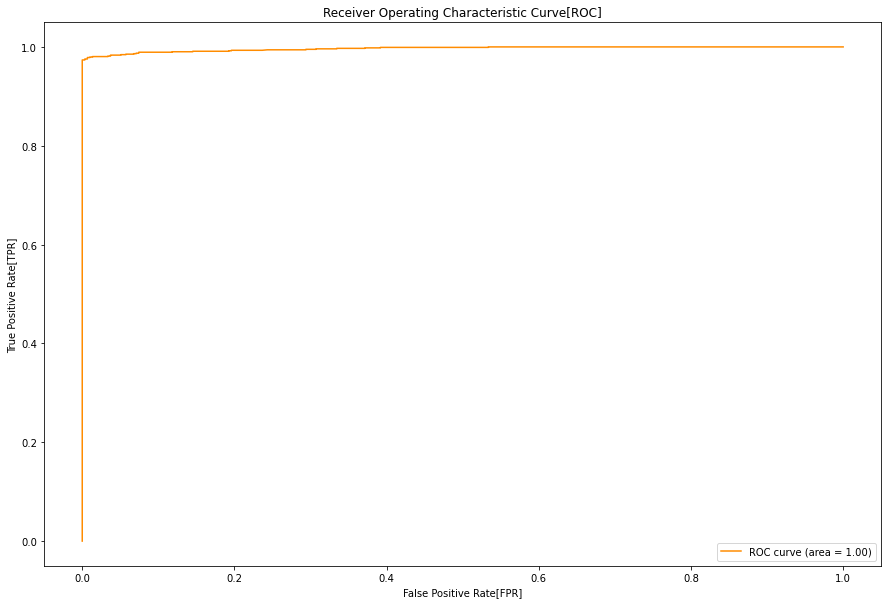

Model's Performance using ROC Curve:  0.9964036617262424
Accuracy achieved by StatsModels Logistic Regression(%):  98.10462471569372


In [241]:
# ROC curve to determine Model's performance and the appropriate Threshold Level Value
# fpr => false positive rate
# tpr => true positive rate

fpr, tpr, thresholds = metrics.roc_curve(card["Acceptance"],preds_prob) #applicable for binary classification Problem
roc_auc = metrics.auc(fpr, tpr) # Area under ROC curve

plt.figure(figsize=(15,10))
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("False Positive Rate[FPR]")
plt.ylabel("True Positive Rate[TPR]")
plt.title('Receiver Operating Characteristic Curve[ROC]')
plt.legend(loc="lower right")
plt.show()

print("Model's Performance using ROC Curve: ",roc_auc)

# Accuracy Calculations
print("Accuracy achieved by StatsModels Logistic Regression(%): ",100*(sum(card["Acceptance"]==card["Predictions"])/card.shape[0]))